In [1]:
import mediapipe as mp
from mediapipe.python.solutions.pose import PoseLandmark
import cv2 as cv 
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from keras.layers import Bidirectional
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras import layers, models, callbacks
import keras

# Making The Annotations

In [51]:
training_folder = "Dataaset/Videos"
dfs = []
for filename in os.listdir(training_folder):
    if filename.endswith(".mp4"):  
        video_path = os.path.join(training_folder, filename)

        print(video_path)
        df = Extract_FeatureVids(video_path)
        dfs.append(df)
        
final_df = pd.concat(dfs, ignore_index=True)
output_csv_path = "non normalized annotations.csv"
final_df.to_csv(output_csv_path, index=False)

print("CSV file containing keypoints and annotations saved at:", output_csv_path)

Dataaset/Videos\h1.mp4
processing the video...
frame_number : 0
label : h1
NOSE_X : 408.2187091112137
processing the video...
frame_number : 1
label : h1
NOSE_X : 399.3829221725464
processing the video...
frame_number : 2
label : h1
NOSE_X : 434.6188666820526
processing the video...
frame_number : 3
label : h1
NOSE_X : 444.0060317516327
processing the video...
frame_number : 4
label : h1
NOSE_X : 437.10947585105896
Dataaset/Videos\h10.mp4
processing the video...
frame_number : 0
label : h10
NOSE_X : 377.2388792037964
processing the video...
frame_number : 1
label : h10
NOSE_X : 377.26274013519287
processing the video...
frame_number : 2
label : h10
NOSE_X : 413.42612743377686
processing the video...
frame_number : 3
label : h10
NOSE_X : 407.9455804824829
processing the video...
frame_number : 4
label : h10
NOSE_X : 409.2084503173828
Dataaset/Videos\h100.mp4
processing the video...
frame_number : 0
label : h100
NOSE_X : 385.52385807037354
processing the video...
frame_number : 1
label :

processing the video...
frame_number : 0
label : h27
NOSE_X : 425.25874614715576
processing the video...
frame_number : 1
label : h27
NOSE_X : 424.368896484375
processing the video...
frame_number : 2
label : h27
NOSE_X : 424.36627864837646
processing the video...
frame_number : 3
label : h27
NOSE_X : 395.74835300445557
processing the video...
frame_number : 4
label : h27
NOSE_X : 400.08726596832275
Dataaset/Videos\h28.mp4
processing the video...
frame_number : 0
label : h28
NOSE_X : 403.5798454284668
processing the video...
frame_number : 1
label : h28
NOSE_X : 390.8763885498047
processing the video...
frame_number : 2
label : h28
NOSE_X : 410.86382389068604
processing the video...
frame_number : 3
label : h28
NOSE_X : 421.12797260284424
processing the video...
frame_number : 4
label : h28
NOSE_X : 416.99307918548584
Dataaset/Videos\h29.mp4
processing the video...
frame_number : 0
label : h29
NOSE_X : 386.5668296813965
processing the video...
frame_number : 1
label : h29
NOSE_X : 389.

frame_number : 1
label : h44
NOSE_X : 353.5314989089966
processing the video...
frame_number : 2
label : h44
NOSE_X : 386.66913986206055
processing the video...
frame_number : 3
label : h44
NOSE_X : 386.394739151001
processing the video...
frame_number : 4
label : h44
NOSE_X : 387.8427457809448
Dataaset/Videos\h45.mp4
processing the video...
frame_number : 0
label : h45
NOSE_X : 123.99046897888184
processing the video...
frame_number : 1
label : h45
NOSE_X : 119.33001279830933
processing the video...
frame_number : 2
label : h45
NOSE_X : 130.59911727905273
processing the video...
frame_number : 3
label : h45
NOSE_X : 177.51462936401367
processing the video...
frame_number : 4
label : h45
NOSE_X : 155.67255020141602
Dataaset/Videos\h46.mp4
processing the video...
frame_number : 0
label : h46
NOSE_X : 135.11781692504883
processing the video...
frame_number : 1
label : h46
NOSE_X : 137.55632400512695
processing the video...
frame_number : 2
label : h46
NOSE_X : 169.0963840484619
processin

frame_number : 0
label : h62
NOSE_X : 333.4948539733887
processing the video...
frame_number : 1
label : h62
NOSE_X : 327.8628444671631
processing the video...
frame_number : 2
label : h62
NOSE_X : 308.64569664001465
processing the video...
frame_number : 3
label : h62
NOSE_X : 310.29290199279785
processing the video...
frame_number : 4
label : h62
NOSE_X : 306.83252334594727
Dataaset/Videos\h63.mp4
processing the video...
frame_number : 0
label : h63
NOSE_X : 287.66810417175293
processing the video...
frame_number : 1
label : h63
NOSE_X : 289.3048667907715
processing the video...
frame_number : 2
label : h63
NOSE_X : 270.7287311553955
processing the video...
frame_number : 3
label : h63
NOSE_X : 272.53984451293945
processing the video...
frame_number : 4
label : h63
NOSE_X : 244.36223030090332
Dataaset/Videos\h64.mp4
processing the video...
frame_number : 0
label : h64
NOSE_X : 276.70177459716797
processing the video...
frame_number : 1
label : h64
NOSE_X : 278.9209270477295
processin

processing the video...
frame_number : 0
label : h80
NOSE_X : 354.347620010376
processing the video...
frame_number : 1
label : h80
NOSE_X : 344.1845154762268
processing the video...
frame_number : 2
label : h80
NOSE_X : 365.6468439102173
processing the video...
frame_number : 3
label : h80
NOSE_X : 370.2405881881714
processing the video...
frame_number : 4
label : h80
NOSE_X : 369.48853969573975
Dataaset/Videos\h81.mp4
processing the video...
frame_number : 0
label : h81
NOSE_X : 315.81946849823
processing the video...
frame_number : 1
label : h81
NOSE_X : 334.84454870224
processing the video...
frame_number : 2
label : h81
NOSE_X : 344.62302446365356
processing the video...
frame_number : 3
label : h81
NOSE_X : 357.6926350593567
processing the video...
frame_number : 4
label : h81
NOSE_X : 351.34393215179443
Dataaset/Videos\h82.mp4
processing the video...
frame_number : 0
label : h82
NOSE_X : 314.82898235321045
processing the video...
frame_number : 1
label : h82
NOSE_X : 320.9775710

Dataaset/Videos\h99.mp4
processing the video...
frame_number : 0
label : h99
NOSE_X : 386.92418575286865
processing the video...
frame_number : 1
label : h99
NOSE_X : 363.38606357574463
processing the video...
frame_number : 2
label : h99
NOSE_X : 372.7190351486206
processing the video...
frame_number : 3
label : h99
NOSE_X : 404.2041778564453
processing the video...
frame_number : 4
label : h99
NOSE_X : 401.95704460144043
Dataaset/Videos\j1.mp4
processing the video...
frame_number : 0
label : j1
NOSE_X : 160.88878870010376
processing the video...
frame_number : 1
label : j1
NOSE_X : 154.5419418811798
processing the video...
frame_number : 2
label : j1
NOSE_X : 164.6562623977661
processing the video...
frame_number : 3
label : j1
NOSE_X : 220.15788316726685
processing the video...
frame_number : 4
label : j1
NOSE_X : 247.60709524154663
Dataaset/Videos\j10.mp4
processing the video...
frame_number : 0
label : j10
NOSE_X : 98.9858865737915
processing the video...
frame_number : 1
label : 

processing the video...
frame_number : 0
label : j26
NOSE_X : 134.22156929969788
processing the video...
frame_number : 1
label : j26
NOSE_X : 134.8495602607727
processing the video...
frame_number : 2
label : j26
NOSE_X : 185.14701426029205
processing the video...
frame_number : 3
label : j26
NOSE_X : 167.9027223587036
processing the video...
frame_number : 4
label : j26
NOSE_X : 117.87025988101959
Dataaset/Videos\j27.mp4
processing the video...
frame_number : 0
label : j27
NOSE_X : 135.38768649101257
processing the video...
frame_number : 1
label : j27
NOSE_X : 154.46617484092712
processing the video...
frame_number : 2
label : j27
NOSE_X : 208.90863955020905
processing the video...
frame_number : 3
label : j27
NOSE_X : 212.3181563615799
processing the video...
frame_number : 4
label : j27
NOSE_X : 188.71796250343323
Dataaset/Videos\j28.mp4
processing the video...
frame_number : 0
label : j28
NOSE_X : 367.3101589679718
processing the video...
frame_number : 1
label : j28
NOSE_X : 367

processing the video...
frame_number : 0
label : j44
NOSE_X : 208.07202100753784
processing the video...
frame_number : 1
label : j44
NOSE_X : 212.97621488571167
processing the video...
frame_number : 2
label : j44
NOSE_X : 256.8453097343445
processing the video...
frame_number : 3
label : j44
NOSE_X : 280.98546981811523
processing the video...
frame_number : 4
label : j44
NOSE_X : 271.1210560798645
Dataaset/Videos\j45.mp4
processing the video...
frame_number : 0
label : j45
NOSE_X : 212.2985601425171
processing the video...
frame_number : 1
label : j45
NOSE_X : 213.34537267684937
processing the video...
frame_number : 2
label : j45
NOSE_X : 239.37086820602417
processing the video...
frame_number : 3
label : j45
NOSE_X : 272.8360605239868
processing the video...
frame_number : 4
label : j45
NOSE_X : 267.95459032058716
Dataaset/Videos\j46.mp4
processing the video...
frame_number : 0
label : j46
NOSE_X : 205.52252769470215
processing the video...
frame_number : 1
label : j46
NOSE_X : 279

frame_number : 4
label : j61
NOSE_X : 216.70480728149414
Dataaset/Videos\j62.mp4
processing the video...
frame_number : 0
label : j62
NOSE_X : 164.64057683944702
processing the video...
frame_number : 1
label : j62
NOSE_X : 151.15408658981323
processing the video...
frame_number : 2
label : j62
NOSE_X : 176.99369430541992
processing the video...
frame_number : 3
label : j62
NOSE_X : 243.3027720451355
processing the video...
frame_number : 4
label : j62
NOSE_X : 224.76336479187012
Dataaset/Videos\j63.mp4
processing the video...
frame_number : 0
label : j63
NOSE_X : 161.6895031929016
processing the video...
frame_number : 1
label : j63
NOSE_X : 163.5302174091339
processing the video...
frame_number : 2
label : j63
NOSE_X : 172.29756474494934
processing the video...
frame_number : 3
label : j63
NOSE_X : 191.00467443466187
processing the video...
frame_number : 4
label : j63
NOSE_X : 190.12038230895996
Dataaset/Videos\j64.mp4
processing the video...
frame_number : 0
label : j64
NOSE_X : 15

frame_number : 0
label : j8
NOSE_X : 189.52327871322632
processing the video...
frame_number : 1
label : j8
NOSE_X : 187.0242600440979
processing the video...
frame_number : 2
label : j8
NOSE_X : 185.98364067077637
processing the video...
frame_number : 3
label : j8
NOSE_X : 186.2152919769287
processing the video...
frame_number : 4
label : j8
NOSE_X : 168.42369174957275
Dataaset/Videos\j80.mp4
processing the video...
frame_number : 0
label : j80
NOSE_X : 201.56989574432373
processing the video...
frame_number : 1
label : j80
NOSE_X : 185.4316234588623
processing the video...
frame_number : 2
label : j80
NOSE_X : 168.9490306377411
processing the video...
frame_number : 3
label : j80
NOSE_X : 214.97875213623047
processing the video...
frame_number : 4
label : j80
NOSE_X : 173.92297267913818
Dataaset/Videos\j81.mp4
processing the video...
frame_number : 0
label : j81
NOSE_X : 131.94038271903992
processing the video...
frame_number : 1
label : j81
NOSE_X : 131.01014971733093
processing th

frame_number : 1
label : j97
NOSE_X : 162.67817616462708
processing the video...
frame_number : 2
label : j97
NOSE_X : 207.70339965820312
processing the video...
frame_number : 3
label : j97
NOSE_X : 219.3907928466797
processing the video...
frame_number : 4
label : j97
NOSE_X : 218.0691933631897
Dataaset/Videos\j98.mp4
processing the video...
frame_number : 0
label : j98
NOSE_X : 163.9407241344452
processing the video...
frame_number : 1
label : j98
NOSE_X : 177.61289834976196
processing the video...
frame_number : 2
label : j98
NOSE_X : 195.31457662582397
processing the video...
frame_number : 3
label : j98
NOSE_X : 201.67068243026733
processing the video...
frame_number : 4
label : j98
NOSE_X : 195.4185390472412
Dataaset/Videos\j99.mp4
processing the video...
frame_number : 0
label : j99
NOSE_X : 155.00954747200012
processing the video...
frame_number : 1
label : j99
NOSE_X : 153.51607203483582
processing the video...
frame_number : 2
label : j99
NOSE_X : 161.31327509880066
processi

processing the video...
frame_number : 0
label : u24
NOSE_X : 307.14370250701904
processing the video...
frame_number : 1
label : u24
NOSE_X : 306.82889699935913
processing the video...
frame_number : 2
label : u24
NOSE_X : 358.6462998390198
processing the video...
frame_number : 3
label : u24
NOSE_X : 382.75813579559326
processing the video...
frame_number : 4
label : u24
NOSE_X : 396.09373569488525
Dataaset/Videos\u25.mp4
processing the video...
frame_number : 0
label : u25
NOSE_X : 306.4840078353882
processing the video...
frame_number : 1
label : u25
NOSE_X : 304.0547847747803
processing the video...
frame_number : 2
label : u25
NOSE_X : 361.2385368347168
processing the video...
frame_number : 3
label : u25
NOSE_X : 373.43173027038574
processing the video...
frame_number : 4
label : u25
NOSE_X : 381.39063835144043
Dataaset/Videos\u26.mp4
processing the video...
frame_number : 0
label : u26
NOSE_X : 309.9895691871643
processing the video...
frame_number : 1
label : u26
NOSE_X : 309.

frame_number : 1
label : u41
NOSE_X : 323.7343668937683
processing the video...
frame_number : 2
label : u41
NOSE_X : 363.52184772491455
processing the video...
frame_number : 3
label : u41
NOSE_X : 380.6077766418457
processing the video...
frame_number : 4
label : u41
NOSE_X : 342.4225401878357
Dataaset/Videos\u42.mp4
processing the video...
frame_number : 0
label : u42
NOSE_X : 175.9601354598999
processing the video...
frame_number : 1
label : u42
NOSE_X : 181.13771438598633
processing the video...
frame_number : 2
label : u42
NOSE_X : 196.36181831359863
processing the video...
frame_number : 3
label : u42
NOSE_X : 212.373948097229
processing the video...
frame_number : 4
label : u42
NOSE_X : 191.83105945587158
Dataaset/Videos\u43.mp4
processing the video...
frame_number : 0
label : u43
NOSE_X : 210.0534152984619
processing the video...
frame_number : 1
label : u43
NOSE_X : 220.32066822052002
processing the video...
frame_number : 2
label : u43
NOSE_X : 230.056471824646
processing th

processing the video...
frame_number : 0
label : u6
NOSE_X : 517.503662109375
processing the video...
frame_number : 1
label : u6
NOSE_X : 527.788200378418
processing the video...
frame_number : 2
label : u6
NOSE_X : 612.2330856323242
processing the video...
frame_number : 3
label : u6
NOSE_X : 578.6240768432617
processing the video...
frame_number : 4
label : u6
NOSE_X : 454.96986389160156
Dataaset/Videos\u60.mp4
processing the video...
frame_number : 0
label : u60
NOSE_X : 169.72745418548584
processing the video...
frame_number : 1
label : u60
NOSE_X : 173.6107349395752
processing the video...
frame_number : 2
label : u60
NOSE_X : 181.05812072753906
processing the video...
frame_number : 3
label : u60
NOSE_X : 187.05586910247803
processing the video...
frame_number : 4
label : u60
NOSE_X : 165.56457996368408
Dataaset/Videos\u61.mp4
processing the video...
frame_number : 0
label : u61
NOSE_X : 185.60070991516113
processing the video...
frame_number : 1
label : u61
NOSE_X : 191.6476249

processing the video...
frame_number : 0
label : u78
NOSE_X : 335.5055522918701
processing the video...
frame_number : 1
label : u78
NOSE_X : 329.79538679122925
processing the video...
frame_number : 2
label : u78
NOSE_X : 407.7380847930908
processing the video...
frame_number : 3
label : u78
NOSE_X : 405.47640323638916
processing the video...
frame_number : 4
label : u78
NOSE_X : 438.8530397415161
Dataaset/Videos\u79.mp4
processing the video...
frame_number : 0
label : u79
NOSE_X : 252.45637893676758
processing the video...
frame_number : 1
label : u79
NOSE_X : 277.49622344970703
processing the video...
frame_number : 2
label : u79
NOSE_X : 277.7310276031494
processing the video...
frame_number : 3
label : u79
NOSE_X : 277.7655029296875
processing the video...
frame_number : 4
label : u79
NOSE_X : 262.0964241027832
Dataaset/Videos\u8.mp4
processing the video...
frame_number : 0
label : u8
NOSE_X : 334.4419813156128
processing the video...
frame_number : 1
label : u8
NOSE_X : 333.27155

frame_number : 1
label : u95
NOSE_X : 392.3155975341797
processing the video...
frame_number : 2
label : u95
NOSE_X : 435.2812385559082
processing the video...
frame_number : 3
label : u95
NOSE_X : 365.3204298019409
processing the video...
frame_number : 4
label : u95
NOSE_X : 372.7640962600708
Dataaset/Videos\u96.mp4
processing the video...
frame_number : 0
label : u96
NOSE_X : 412.60202407836914
processing the video...
frame_number : 1
label : u96
NOSE_X : 458.02894592285156
processing the video...
frame_number : 2
label : u96
NOSE_X : 466.9231939315796
processing the video...
frame_number : 3
label : u96
NOSE_X : 373.1556558609009
processing the video...
frame_number : 4
label : u96
NOSE_X : 380.70871353149414
Dataaset/Videos\u97.mp4
processing the video...
frame_number : 0
label : u97
NOSE_X : 376.02192878723145
processing the video...
frame_number : 1
label : u97
NOSE_X : 339.44745540618896
processing the video...
frame_number : 2
label : u97
NOSE_X : 406.17695331573486
processing

In [50]:
def Extract_FeatureVids(video_path):
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose
    cap = cv.VideoCapture(video_path)
    data = []
    sequence_length = 5
    video_name = os.path.basename(video_path).split(".")[0] 
    frame_number = 0
    
    # Define the landmarks you are interested in
    landmarks_of_interest = [
        mp_pose.PoseLandmark.NOSE,
        mp_pose.PoseLandmark.RIGHT_SHOULDER,
        mp_pose.PoseLandmark.RIGHT_ELBOW,
        mp_pose.PoseLandmark.RIGHT_WRIST,
        mp_pose.PoseLandmark.LEFT_SHOULDER,
        mp_pose.PoseLandmark.LEFT_ELBOW,
        mp_pose.PoseLandmark.LEFT_WRIST,
        mp_pose.PoseLandmark.RIGHT_HIP,
        mp_pose.PoseLandmark.RIGHT_KNEE,
        mp_pose.PoseLandmark.RIGHT_ANKLE,
        mp_pose.PoseLandmark.LEFT_HIP,
        mp_pose.PoseLandmark.LEFT_KNEE,
        mp_pose.PoseLandmark.LEFT_ANKLE
    ]
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=1) as pose:
        frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

        skip_interval = max(int(frame_count / sequence_length), 1)
        
        for counter in range(sequence_length):
            # Set the current frame position of the video
            cap.set(cv.CAP_PROP_POS_FRAMES, counter * skip_interval)
            ret, frame = cap.read()
            
            if not ret:
                # No more frames to read
                break

            
            print("processing the video...")
            image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
             
            image_height, image_width, _ = image.shape
            results = pose.process(image)
            
            keypoints = {
                "frame_number": frame_number,
                "label": video_name
            }
            if results.pose_landmarks is not None:
                image.flags.writeable = True
                image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                tem = results.pose_landmarks.landmark
                
                for landmark in landmarks_of_interest:
                    tem_landmark = tem[landmark]
                    
                    keypoints[f"{landmark.name}_X"] = tem_landmark.x * image_width
                    keypoints[f"{landmark.name}_Y"] = tem_landmark.y * image_height
                    keypoints[f"{landmark.name}_Z"] = tem_landmark.z
            else:
                print("No pose landmarks detected in the image.")
                for landmark in landmarks_of_interest:
                    keypoints[f"{landmark.name}_X"] = 0
                    keypoints[f"{landmark.name}_Y"] = 0
                    keypoints[f"{landmark.name}_Z"] = 0
            
            frame_number += 1
            for key, value in list(keypoints.items())[:3]:
                print(key, ":", value)
            data.append(keypoints.copy())
            
        cap.release()
        
        df = pd.DataFrame(data)
        
        

    return df


# Video Demo

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

videoPath = "Untitled video - Made with Clipchamp (4).mp4"
outputPath = "annotated_video.mp4"

cap = cv.VideoCapture(videoPath)

fps = int(cap.get(cv.CAP_PROP_FPS))
frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(outputPath, fourcc, fps, (frame_width, frame_height))

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=1) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        
        results = pose.process(image)
        
        image.flags.writeable  = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        out.write(image)

        cv.imshow('Mediapipe Feed', image)

        if cv.waitKey(15) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv.destroyAllWindows()


# Adjust Size + Taking Less Frames

In [6]:
def Video_Preprocess(video_path):
    print(video_path)
    width=64
    height=64
    sequence_length=10
    frames_list=[]

    video_reader = cv.VideoCapture(video_path)

    frame_count=int(video_reader.get(cv.CAP_PROP_FRAME_COUNT))

    skip_interval = max(int(frame_count/sequence_length), 1)

    for counter in range(sequence_length):

        video_reader.set(cv.CAP_PROP_POS_FRAMES, counter * skip_interval)

        ret, frame = video_reader.read()
        if not ret:
            break;
        frame=cv.resize(frame, (height, width))
        frame = frame/255
        frames_list.append(frame)
    video_reader.release()
    return frames_list

# Testing The Action Recognition model

In [3]:


model = load_model('BiDirLSTM_model.h5')

# Initialize MediaPipe for pose detection
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define the mapping from output indices to move names
move_names = {0: 'hook', 1: 'jap', 2: 'upper'}

# Define the landmarks of interest
landmarks_of_interest = [
    mp_pose.PoseLandmark.NOSE,
    mp_pose.PoseLandmark.RIGHT_SHOULDER,
    mp_pose.PoseLandmark.RIGHT_ELBOW,
    mp_pose.PoseLandmark.RIGHT_WRIST,
    mp_pose.PoseLandmark.LEFT_SHOULDER,
    mp_pose.PoseLandmark.LEFT_ELBOW,
    mp_pose.PoseLandmark.LEFT_WRIST,
    mp_pose.PoseLandmark.RIGHT_HIP,
    mp_pose.PoseLandmark.RIGHT_KNEE,
    mp_pose.PoseLandmark.RIGHT_ANKLE,
    mp_pose.PoseLandmark.LEFT_HIP,
    mp_pose.PoseLandmark.LEFT_KNEE,
    mp_pose.PoseLandmark.LEFT_ANKLE
]

def preprocess_landmarks(landmarks, image_width, image_height):
    flattened = []
    for landmark in landmarks_of_interest:
        tem_landmark = landmarks[landmark]
        flattened.extend([tem_landmark.x * image_width, tem_landmark.y * image_height, tem_landmark.z])
    return np.array(flattened)

def process_video_stream(video_source, frame_count, output_path):
    cap = cv.VideoCapture(video_source)
    
    # Get video properties
    fps = int(cap.get(cv.CAP_PROP_FPS))
    frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    
    # Define the codec and create VideoWriter object
    fourcc = cv.VideoWriter_fourcc(*'XVID')
    out = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frames = []
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=1) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Resize frame to 640x480 and normalize
            frame2 = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
            # Process the frame with MediaPipe Pose
            results = pose.process(frame2)

            print('AFTER RESULTS')
            if results.pose_landmarks:
                # Extract and preprocess landmarks
                image_height, image_width, _ = frame2.shape
                landmarks = preprocess_landmarks(results.pose_landmarks.landmark, image_width, image_height)
                frames.append(landmarks)
                print('Before IF')
                # Maintain a sliding window of frames
                if len(frames) == frame_count:
                    print('IN IF')
                    input_frames = np.expand_dims(frames, axis=0)  # Add batch dimension
                    input_frames = np.reshape(input_frames, (1, frame_count, 39))  # Reshape to match the model input shape
                    
                    # Predict the move
                    prediction = model.predict(input_frames)
                    print(prediction)
                    
                    # Interpret the prediction (using the mapping)
                    max_probability = np.max(prediction)
                    print(max_probability)
                    if max_probability < 0.35: #Not Working As Expected
                        move = 'No Punch'
                    else:
                        # Interpret the prediction (using the mapping)
                        predicted_index = np.argmax(prediction)
                        move = move_names[predicted_index]
                    
                    # Display the result on the video
                    cv.putText(frame2, f'Move: {move}', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv.LINE_AA)
                    
                    # Remove the oldest frame to maintain the sliding window
                    frames.pop(0)

            # Draw landmarks on the frame
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(frame2, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            # Write annotated frame to the output video
            out.write(cv.cvtColor(frame2, cv.COLOR_RGB2BGR))
            frame2 = cv.cvtColor(frame2, cv.COLOR_RGB2BGR)
            # Display the frame
            cv.imshow('Mediapipe Feed', frame2)

            # Exit if 'q' is pressed
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
    
    # Release resources
    cap.release()
    out.release()
    cv.destroyAllWindows()

# Example usage
video_source = 'fulltest.mp4'  # Path to your input video file
frame_count = 5  # Number of frames in each sequence for prediction
output_path = "BidirLSTM.avi"  # Path to save the annotated video

process_video_stream(video_source, frame_count, output_path)


AFTER RESULTS
Before IF
AFTER RESULTS
Before IF
AFTER RESULTS
Before IF
AFTER RESULTS
Before IF
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 113ms/step
[[0.707149   0.14485946 0.1479915 ]]
0.707149
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 21ms/step
[[0.707149   0.14485946 0.1479915 ]]
0.707149
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 21ms/step
[[0.6793084  0.15165716 0.16903438]]
0.6793084
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.65198    0.16024594 0.187774  ]]
0.65198
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.60140055 0.16890764 0.2296918 ]]
0.60140055
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.34571016 0.2135169  0.4407729 ]]
0.4407729
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 23ms/step
[[0.01179653 0.26112506 0.72707844]]
0.72707844
AF

1/1 [==============================] - 0s 22ms/step
[[0.54211104 0.24202557 0.21586338]]
0.54211104
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 21ms/step
[[0.5517664  0.2449808  0.20325278]]
0.5517664
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 21ms/step
[[0.5493871  0.22678466 0.22382824]]
0.5493871
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.5493871  0.22678466 0.22382824]]
0.5493871
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.5714989  0.20709668 0.2214045 ]]
0.5714989
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.66132677 0.18891557 0.14975765]]
0.66132677
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 23ms/step
[[0.6910587 0.1870349 0.1219064]]
0.6910587
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 21ms/step
[[0.6924168  0.18679981 0.12078336]]
0.6924168

[[0.4370794  0.27286077 0.2900598 ]]
0.4370794
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.35601124 0.28786135 0.3561274 ]]
0.3561274
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.31560948 0.2938957  0.39049485]]
0.39049485
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.32061067 0.2946465  0.38474277]]
0.38474277
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 21ms/step
[[0.3963495  0.27290997 0.33074054]]
0.3963495
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.43143043 0.26711974 0.30144984]]
0.43143043
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.46226376 0.26247385 0.27526245]]
0.46226376
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.46226376 0.26247385 0.27526245]]
0.46226376
AFTER RESULTS
Before IF
IN IF
1/1 [==========

1/1 [==============================] - 0s 20ms/step
[[0.4600504  0.28317514 0.25677443]]
0.4600504
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.3252833  0.2970043  0.37771243]]
0.37771243
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.30944303 0.30906498 0.38149202]]
0.38149202
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 18ms/step
[[0.31700373 0.30903634 0.37396002]]
0.37396002
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.3967867  0.29392302 0.30929026]]
0.3967867
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 20ms/step
[[0.3967867  0.29392302 0.30929026]]
0.3967867
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 19ms/step
[[0.33722743 0.27287346 0.38989913]]
0.38989913
AFTER RESULTS
Before IF
IN IF
1/1 [==============================] - 0s 18ms/step
[[0.3354628  0.27804872 0.38648847]]
0.38

# Video Input to Models

In [ ]:
#feature extraction similar to extracted DF (above function)


#y = np.arary(video["label"]) --->Video Name      >>for test purpose<<
#in real life case the output is >y<


#video.drop(["frame_number", "label"], axis=1, inplace=True)
#x = video np.array(data) --->features
#normalize(x)

# Preparing Dataset For Feeding LSTM Model 

In [52]:
data = pd.read_csv("Dataaset/Keypoints/non_normalized_annotations.csv")

y = np.array(data["label"])

data.drop(["frame_number", "label"], axis=1, inplace=True)

print("Data shape after dropping columns:", data.shape)

sequence_length = 5

X = np.array(data)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized)
X_sequences = []
y_sequences = []
for i in range(0, len(X_normalized) - sequence_length + 1, sequence_length):
    X_sequences.append(X_normalized[i:i+sequence_length])
    y_sequences.append(y[i])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)
print(X_sequences.shape)

x_train, x_test, y_train, y_test= train_test_split(X_sequences, y_sequences, test_size=0.4, random_state=41)#, shuffle=True)
x_val, x_test, y_val, y_test=train_test_split(x_test, y_test, test_size=0.5, random_state=41) #, shuffle=True)
print("This is the shape of x")
print(x_test.shape)
for i in range(len(y_train)):
    if y_train[i].startswith('j'):
        y_train[i] = 'jap'
    elif y_train[i].startswith('h'):
        y_train[i] = 'hook'
    elif y_train[i].startswith('u'):
        y_train[i] = 'upper'

for i in range(len(y_val)):
    if y_val[i].startswith('j'):
        y_val[i] = 'jap'
    elif y_val[i].startswith('h'):
        y_val[i] = 'hook'
    elif y_val[i].startswith('u'):
        y_val[i] = 'upper'
        
for i in range(len(y_test)):
    if y_test[i].startswith('j'):
        y_test[i] = 'jap'
    elif y_test[i].startswith('h'):
        y_test[i] = 'hook'
    elif y_test[i].startswith('u'):
        y_test[i] = 'upper'

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)
y_test_categorical = to_categorical(y_test_encoded)

print(y_test_categorical)

Data shape after dropping columns: (1500, 39)
[[ 0.93294607 -1.52884277 -0.33314271 ...  1.45577823 -2.24783889
  -1.36568094]
 [ 0.85356742 -1.51546891 -0.48709248 ...  1.45457938 -2.24941203
  -1.63819445]
 [ 1.17011895 -1.53291518  0.12571816 ...  1.45154014 -2.24986759
  -1.17127726]
 ...
 [ 1.16866946  1.43713723 -0.44445506 ...  0.53945511  0.79108968
   1.06127231]
 [ 1.23301287  1.41578802 -0.98858165 ...  0.55750007  0.77866407
   1.39939185]
 [ 0.42531715  1.40250278 -1.03648862 ...  0.50006008  0.77894278
   1.74478722]]
(300, 5, 39)
This is the shape of x
(60, 5, 39)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0

In [18]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1790, 3, 39)
(597, 3, 39)
(597, 3, 39)


# Build Model ArchitetureAnd Train Model

In [53]:
simple_lstm = Sequential()

simple_lstm.add(LSTM(units=32, input_shape=(5, 39), return_sequences=True, recurrent_dropout=0.5))

simple_lstm.add(Dropout(0.5))

simple_lstm.add(LSTM(units=16, return_sequences=False, recurrent_dropout=0.5))

simple_lstm.add(Dropout(0.5))

simple_lstm.add(Dense(units=3, activation='softmax'))  # 3 output classes: jap, hook, uppercut

simple_lstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 32)             9216      
                                                                 
 dropout_18 (Dropout)        (None, 5, 32)             0         
                                                                 
 lstm_7 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 3)                 51        
                                                                 
Total params: 12403 (48.45 KB)
Trainable params: 12403 (48.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
simple_lstm.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [55]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train_categorical:", y_train_categorical.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)



Shape of x_train: (180, 5, 39)
Shape of y_train_categorical: (180, 3)
Shape of x_test: (60, 5, 39)
Shape of y_test_categorical: (60, 3)


In [56]:
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)
history = simple_lstm.fit(x_train, y_train_categorical, batch_size=31, epochs=50, validation_data=(x_val, y_val_categorical), callbacks=[es])


Epoch 1/50
6/6 [==============================] - 6s 136ms/step - loss: 1.0969 - accuracy: 0.3833 - val_loss: 1.0233 - val_accuracy: 0.8000
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.9973 - accuracy: 0.6222 - val_loss: 0.9245 - val_accuracy: 0.9167
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.8888 - accuracy: 0.7667 - val_loss: 0.8341 - val_accuracy: 0.9333
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8249 - accuracy: 0.8056 - val_loss: 0.7490 - val_accuracy: 0.9167
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.7603 - accuracy: 0.8444 - val_loss: 0.6682 - val_accuracy: 0.9000
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6793 - accuracy: 0.8667 - val_loss: 0.5934 - val_accuracy: 0.9000
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6214 - accuracy: 0.8389 - val_loss: 0.5293 - val_accuracy: 0.9000
Epoch 8/50
6/6 [==========

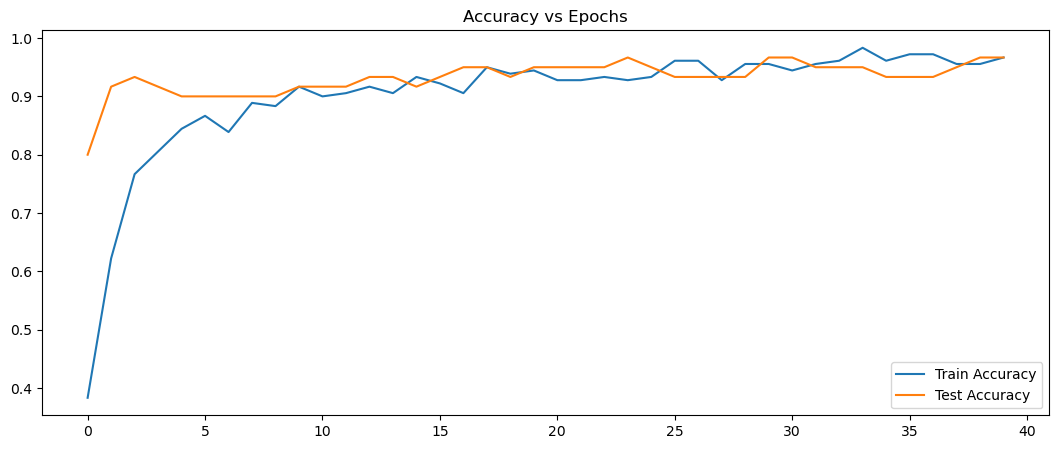

In [57]:
plt.figure(figsize=(13,5))
plt.title("Accuracy vs Epochs")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='best')
plt.show()

In [58]:
simple_lstm.save('LSTM.h5')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:

HAR_boxing_SimpleLSTMmodel = load_model('LSTM.h5', custom_objects={'Input': Input})


In [61]:
HAR_boxing_SimpleLSTMmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 32)             9216      
                                                                 
 dropout_18 (Dropout)        (None, 5, 32)             0         
                                                                 
 lstm_7 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 3)                 51        
                                                                 
Total params: 12403 (48.45 KB)
Trainable params: 12403 (48.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
loss, acc = HAR_boxing_SimpleLSTMmodel.evaluate(x_test, y_test_categorical)

2/2 [==============================] - 1s 5ms/step - loss: 0.1173 - accuracy: 0.9667


In [64]:
BiDir_model = Sequential()
BiDir_model.add(Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(5,39)))
BiDir_model.add(Dropout(0.2))
BiDir_model.add(Bidirectional(LSTM(256, return_sequences=True, activation='relu')))
BiDir_model.add(Dropout(0.2))
BiDir_model.add(Bidirectional(LSTM(256, return_sequences=False, activation='relu')))
BiDir_model.add(BatchNormalization())
BiDir_model.add(Dense(256, activation='relu'))
BiDir_model.add(Dense(128, activation='relu'))
BiDir_model.add(Dense(64, activation='relu'))
BiDir_model.add(Dense(3, activation='softmax'))
BiDir_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 5, 256)            172032    
 onal)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 5, 256)            0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 5, 512)            1050624   
 onal)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 5, 512)            0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                      

In [65]:
BiDir_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [66]:
es = EarlyStopping(monitor='val_loss', patience=15, mode='min', restore_best_weights=True)
history = BiDir_model.fit(x_train, y_train_categorical, batch_size=32, epochs=50, validation_data=(x_val, y_val_categorical), callbacks=[es])

Epoch 1/50
6/6 [==============================] - 11s 285ms/step - loss: 0.5779 - accuracy: 0.7722 - val_loss: 0.9045 - val_accuracy: 0.7167
Epoch 2/50
6/6 [==============================] - 0s 72ms/step - loss: 0.2079 - accuracy: 0.9278 - val_loss: 0.6986 - val_accuracy: 0.7667
Epoch 3/50
6/6 [==============================] - 0s 70ms/step - loss: 0.2077 - accuracy: 0.8722 - val_loss: 0.5957 - val_accuracy: 0.8333
Epoch 4/50
6/6 [==============================] - 0s 72ms/step - loss: 0.1458 - accuracy: 0.9333 - val_loss: 0.5707 - val_accuracy: 0.7500
Epoch 5/50
6/6 [==============================] - 0s 71ms/step - loss: 0.1419 - accuracy: 0.9389 - val_loss: 0.5634 - val_accuracy: 0.7833
Epoch 6/50
6/6 [==============================] - 0s 71ms/step - loss: 0.1095 - accuracy: 0.9556 - val_loss: 0.5624 - val_accuracy: 0.8500
Epoch 7/50
6/6 [==============================] - 0s 72ms/step - loss: 0.1209 - accuracy: 0.9389 - val_loss: 0.5387 - val_accuracy: 0.9167
Epoch 8/50
6/6 [=========

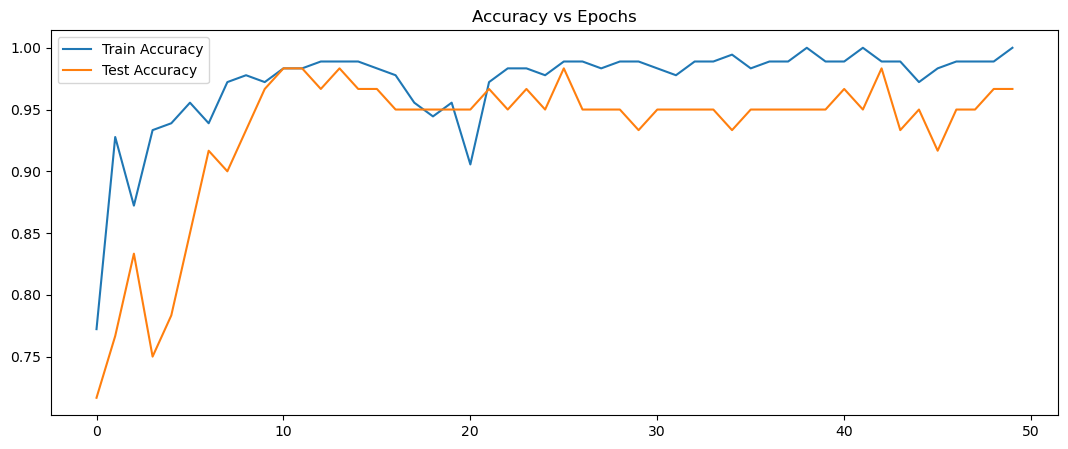

In [67]:
plt.figure(figsize=(13,5))
plt.title("Accuracy vs Epochs")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='best')
plt.show()

In [68]:
import tensorflow as tf
print(tf.__version__)

2.15.1


In [69]:
BiDir_model.save('BiDirectionalLSTM2.keras')

In [70]:
HAR_Boxing_BidirModel = keras.saving.load_model("BiDirectionalLSTM2.keras")


In [71]:
loss, acc = HAR_Boxing_BidirModel.evaluate(x_test, y_test_categorical)

2/2 [==============================] - 2s 10ms/step - loss: 0.1443 - accuracy: 0.9667


In [72]:
HAR_Boxing_BidirModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 5, 256)            172032    
 onal)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 5, 256)            0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 5, 512)            1050624   
 onal)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 5, 512)            0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                      

In [73]:

def create_transformer_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

num_classes = y_train_categorical.shape[1]

transformer_model = create_transformer_model(
    input_shape=(x_train.shape[1], x_train.shape[2]),
    num_classes=num_classes
)

es = callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min', restore_best_weights=True)
history = transformer_model.fit(x_train, y_train_categorical, batch_size=32, epochs=50, validation_data=(x_val, y_val_categorical), callbacks=[es])


Epoch 1/50
6/6 [==============================] - 2s 55ms/step - loss: 1.0871 - accuracy: 0.4222 - val_loss: 0.7806 - val_accuracy: 0.6500
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.7141 - accuracy: 0.7556 - val_loss: 0.5350 - val_accuracy: 0.8667
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5593 - accuracy: 0.7778 - val_loss: 0.4130 - val_accuracy: 0.8667
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4105 - accuracy: 0.8611 - val_loss: 0.3402 - val_accuracy: 0.9333
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3271 - accuracy: 0.8944 - val_loss: 0.2858 - val_accuracy: 0.9167
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2901 - accuracy: 0.8944 - val_loss: 0.2462 - val_accuracy: 0.8833
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.2402 - accuracy: 0.9111 - val_loss: 0.2180 - val_accuracy: 0.9167
Epoch 8/50
6/6 [================

In [75]:
transformer_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 5, 39)]              0         []                            
                                                                                                  
 multi_head_attention_4 (Mu  (None, 5, 39)                675       ['input_5[0][0]',             
 ltiHeadAttention)                                                   'input_5[0][0]']             
                                                                                                  
 dropout_22 (Dropout)        (None, 5, 39)                0         ['multi_head_attention_4[0][0]
                                                                    ']                            
                                                                                            

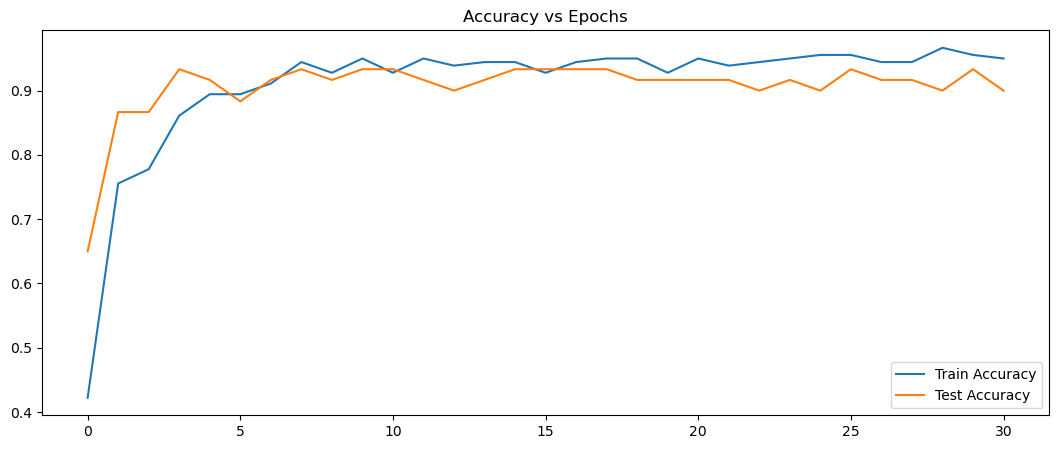

In [76]:
plt.figure(figsize=(13,5))
plt.title("Accuracy vs Epochs")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='best')
plt.show()

In [77]:
transformer_model.save("transformer_model.h5")

In [78]:
HAR_boxing_transformer = load_model('transformer_model.h5')

In [79]:
HAR_boxing_transformer.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 5, 39)]              0         []                            
                                                                                                  
 multi_head_attention_4 (Mu  (None, 5, 39)                675       ['input_5[0][0]',             
 ltiHeadAttention)                                                   'input_5[0][0]']             
                                                                                                  
 dropout_22 (Dropout)        (None, 5, 39)                0         ['multi_head_attention_4[0][0]
                                                                    ']                            
                                                                                            

In [80]:
loss, acc = HAR_boxing_transformer.evaluate(x_test, y_test_categorical)

2/2 [==============================] - 0s 4ms/step - loss: 0.1913 - accuracy: 0.9167


In [ ]:
print(y_test_categorical)

In [82]:
from sklearn.metrics import classification_report

y_pred1 = HAR_boxing_SimpleLSTMmodel.predict(x_test)
y_pred2 = HAR_Boxing_BidirModel.predict(x_test)
y_pred3 = HAR_boxing_transformer.predict(x_test)

y_pred_labels1 = np.argmax(y_pred1, axis=1)
y_pred_labels2 = np.argmax(y_pred2, axis=1)
y_pred_labels3 = np.argmax(y_pred3, axis=1)

report1 = classification_report(np.argmax(y_test_categorical, axis=1), y_pred_labels1)
report2 = classification_report(np.argmax(y_test_categorical, axis=1), y_pred_labels2)
report3 = classification_report(np.argmax(y_test_categorical, axis=1), y_pred_labels3)

print("Model 1 Classification Report:\n", report1)
print("Model 2 Classification Report:\n", report2)
print("Model 3 Classification Report:\n", report3)


2/2 [==============================] - 0s 3ms/step
Model 1 Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      1.00      1.00        20
           2       1.00      0.90      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Model 2 Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Model 3 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79   